In [2]:
import pandas as pd
import numpy as np
import datetime
import time

import matplotlib.pyplot as plt

## Data

### Unnormalized

In [3]:
# Read data
df = pd.read_csv('USD_IDR_bloomberg_features_engineered.csv')

df

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,...,open_change_perc,high_change_perc,low_change_perc,close_change_perc,prev_daily_range,daily_range_change,open_prev_close_change,volatility,prev_volatility,volatility_change
0,2012-01-02,9150.0,9200.0,9067.0,9080.0,1,9135.0,50.0,-8.0,4.0,...,0.005495,-0.000869,0.000441,0.001434,145.0,-12.0,83.0,1.453552,1.593407,-0.139855
1,2012-01-03,9090.0,9185.0,9090.0,9135.0,1,9137.0,-60.0,-15.0,23.0,...,-0.006557,-0.001630,0.002537,0.006057,133.0,-38.0,10.0,1.045105,1.453552,-0.408447
2,2012-01-04,9160.0,9185.0,9137.0,9137.0,1,9193.0,70.0,0.0,47.0,...,0.007701,0.000000,0.005171,0.000219,95.0,-47.0,25.0,0.524017,1.045105,-0.521087
3,2012-01-05,9175.0,9203.0,9112.0,9193.0,1,9095.0,15.0,18.0,-25.0,...,0.001638,0.001960,-0.002736,0.006129,48.0,43.0,38.0,0.991826,0.524017,0.467808
4,2012-01-06,9178.0,9213.0,9095.0,9095.0,3,9150.0,3.0,10.0,-17.0,...,0.000327,0.001087,-0.001866,-0.010660,91.0,27.0,-15.0,1.285683,0.991826,0.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2024-10-21,15463.0,15498.0,15431.0,15495.0,1,15560.0,-60.0,-25.0,-16.0,...,-0.003865,-0.001611,-0.001036,0.001940,76.0,-9.0,-2.0,0.433292,0.489596,-0.056304
3130,2024-10-22,15534.0,15572.0,15534.0,15560.0,1,15620.0,71.0,74.0,103.0,...,0.004592,0.004775,0.006675,0.004195,67.0,-29.0,39.0,0.244625,0.433292,-0.188668
3131,2024-10-23,15590.0,15633.0,15590.0,15620.0,1,15584.0,56.0,61.0,56.0,...,0.003605,0.003917,0.003605,0.003856,38.0,5.0,30.0,0.275818,0.244625,0.031193
3132,2024-10-24,15640.0,15644.0,15580.0,15584.0,1,15640.0,50.0,11.0,-10.0,...,0.003207,0.000704,-0.000641,-0.002305,43.0,21.0,20.0,0.409207,0.275818,0.133389


### Normalized

In [7]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is already loaded with the given structure
# Define the columns for independent z-score scaling and the one using 'close' scaling
independent_zscore_cols = [
    'open', 'high', 'low', 'close', 
    'open_change', 'high_change', 'low_change', 'close_change',
    'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 'prev_low',
    'prev_close', 'daily_range', 'gap_change', 'prev_daily_range', 
    'daily_range_change', 'open_prev_close_change'
]

# Calculate z-scores independently for each specified column
df_scaled = df.copy()
scaling_params = pd.DataFrame(columns=['column', 'mean', 'std'])

for col in independent_zscore_cols:
    mean, std = df[col].mean(), df[col].std()
    df_scaled[col] = (df[col] - mean) / std
    scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': [col], 'mean': [mean], 'std': [std]})], ignore_index=True)

# Calculate mean and std for 'close' column to use on 'next_close'
close_mean, close_std = df['close'].mean(), df['close'].std()
df_scaled['next_close'] = (df['next_close'] - close_mean) / close_std

# Add 'next_close' scaling parameters
scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': ['next_close'], 'mean': [close_mean], 'std': [close_std]})], ignore_index=True)

# Output the scaled DataFrame and scaling parameters DataFrame
scaling_params, df_scaled

/tmp/ipykernel_1086701/75972096.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scaling_params = pd.concat([scaling_params, pd.DataFrame({'column': [col], 'mean': [mean], 'std': [std]})], ignore_index=True)


(         date      open      high       low     close  gap_day  next_close  \
 0  2012-01-02 -2.284824 -2.278207 -2.317340 -2.324989        1   -2.295363   
 1  2012-01-03 -2.317137 -2.286296 -2.304957 -2.295363        1   -2.294285   
 2  2012-01-04 -2.279438 -2.286296 -2.279652 -2.294285        1   -2.264121   
 3  2012-01-05 -2.271360 -2.276589 -2.293112 -2.264121        1   -2.316909   
 4  2012-01-06 -2.269744 -2.271196 -2.302265 -2.316909        3   -2.287283   
 
    open_change  high_change  low_change  ...  open_change_perc  \
 0     0.851788    -0.184690    0.034362  ...          0.005495   
 1    -1.103528    -0.313288    0.375607  ...         -0.006557   
 2     1.207300    -0.037721    0.806654  ...          0.007701   
 3     0.229642     0.292959   -0.486486  ...          0.001638   
 4     0.016335     0.145990   -0.342804  ...          0.000327   
 
    high_change_perc  low_change_perc  close_change_perc  prev_daily_range  \
 0         -0.000869         0.000441     

## Machine Learning Models

### Linear Regression

#### for unnormalized data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
window_sizes = [400]

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse_perc:.3f}%, Avg Training RMSE: {avg_train_rmse:.3f}, Var RMSE: {var_train_rmse_perc:.3f}')
    print(f'Window size {window_size} | Avg Validation RMSE: {avg_val_rmse_perc:.3f}%, Avg Validation RMSE: {avg_val_rmse:.3f}, Var RMSE: {var_val_rmse_perc:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

#### for normalized data (z-score method)

In [17]:
# For Z-Score Normalization, use df_scaled instead of df

from sklearn.linear_model import LinearRegression

# Assume close_mean and close_std are the mean and std for 'next_close' calculated during normalization
close_mean, close_std = scaling_params.loc[scaling_params['column'] == 'next_close', ['mean', 'std']].values[0]

# Separate df_scaled into features and target
features_df = df_scaled.drop(['date', 'next_close'], axis=1)
target_df = df_scaled['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
window_sizes = [400]

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation and training data
        y_pred_val = model.predict(X_val)
        y_pred_train = model.predict(X_train)

        # Denormalize predictions
        y_pred_val_denorm = (y_pred_val * close_std) + close_mean
        y_pred_train_denorm = (y_pred_train * close_std) + close_mean
        y_val_denorm = (y_val * close_std) + close_mean
        y_train_denorm = (y_train * close_std) + close_mean

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val_denorm - y_pred_val_denorm) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val_denorm)[0] * 100  # Convert to percentage

        # Calculate RMSE and RMSE percentage for training
        mse_train = np.mean((y_train_denorm - y_pred_train_denorm) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train_denorm).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse:.3f}, Avg Validation RMSE: {avg_val_rmse:.3f}, Var Validation RMSE: {var_val_rmse:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size 400 | Avg Training RMSE: 49.360, Avg Validation RMSE: 41.315, Var Validation RMSE: 3187.811

Summary of RMSE Results for Each Window Size:


,window_size,min_val_rmse,max_val_rmse,avg_val_rmse,var_val_rmse,min_val_rmse_perc,max_val_rmse_perc,avg_val_rmse_perc,var_val_rmse_perc,min_train_rmse,max_train_rmse,avg_train_rmse,var_train_rmse,min_train_rmse_perc,max_train_rmse_perc,avg_train_rmse_perc,var_train_rmse_perc
0,400,0.003709,1289.129216,41.315082,3187.81117,0.000026,7.906343,0.296305,0.15781,26.494422,73.824865,49.360408,164.418627,0.197588,0.516651,0.367286,0.008299


#### Visualization (for window tuning)

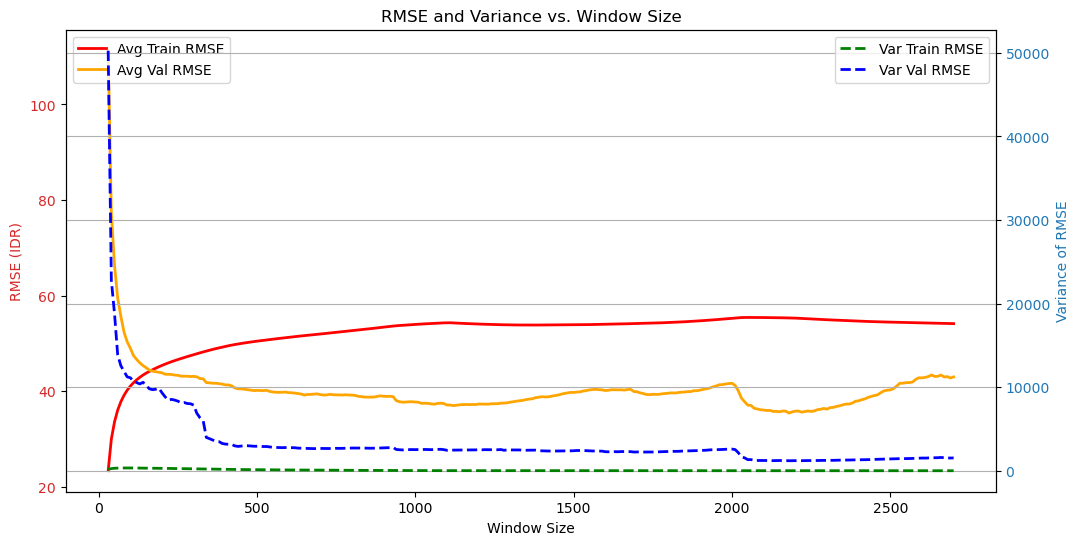

In [16]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

### Other Method

## Deep Learning Models